### Deep learning frameworks

https://pratikdsharma.com/popular-deep-learning-frameworks/

## What is a Neural Network?

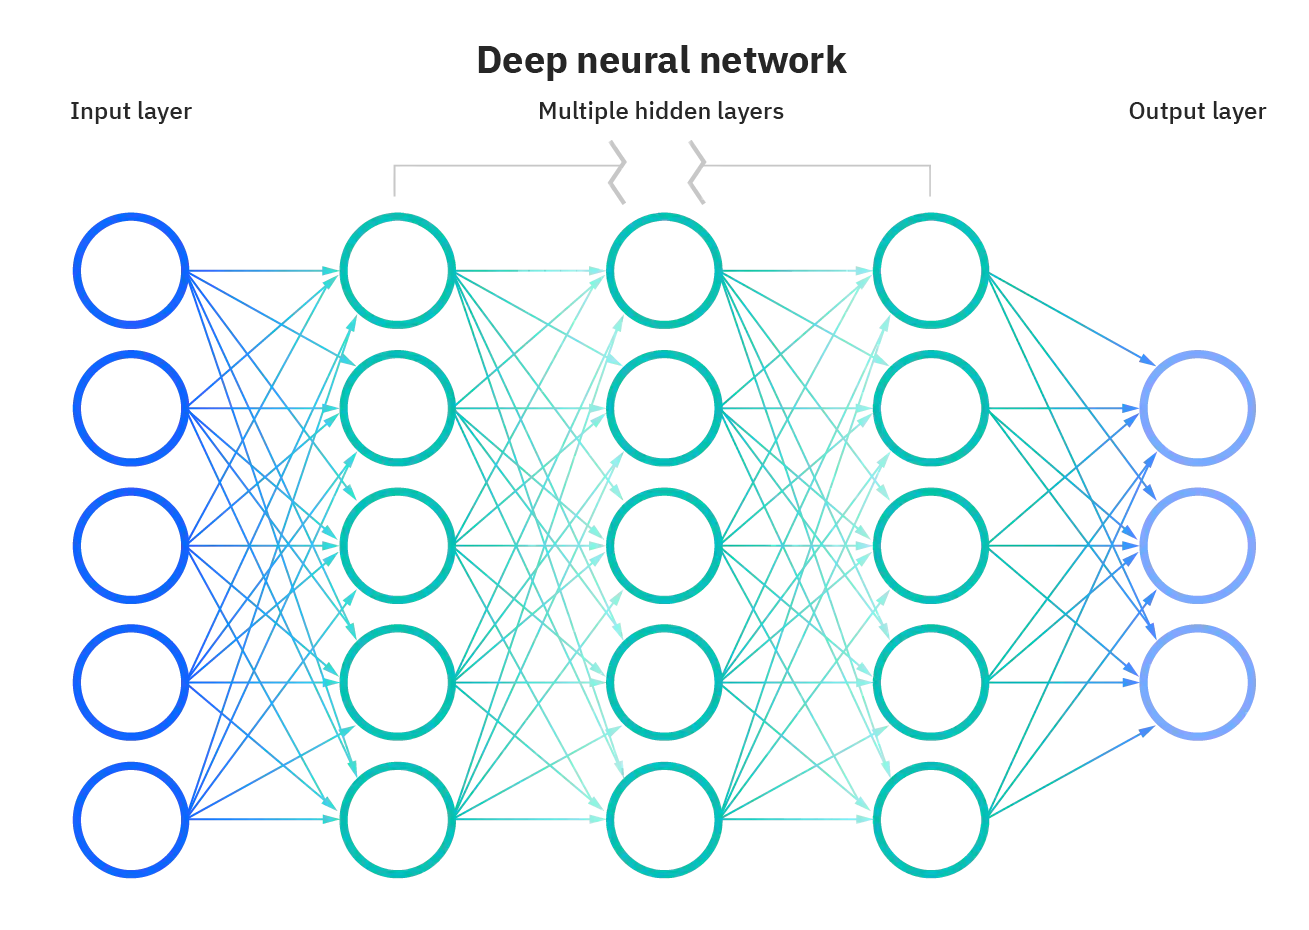

* **Neural networks**, also known as **artificial neural networks (ANNs)** or simulated neural networks (SNNs), are a subset of machine learning and are at **the heart of deep learning algorithms**

* Their name and structure are inspired by the human brain, mimicking the way that biological neurons signal to one another.

* Each node, or **artificial neuron**, connects to another and has an associated **weight** and **threshold**. 
* If the output of any individual node is above **the specified threshold value**, that node is activated, sending data to the next layer of the network.Otherwise, no data is passed along to the next layer of the network.
* There are three types of layers: an **input layer**, an **output layer**, and a **hidden layer.**

## How neural networks works ?

==> check the article : https://www.ibm.com/cloud/learn/neural-networks

## Useful Links 

* Tensorflow documentation : https://www.tensorflow.org/api_docs/python/tf
* keras documentation : https://keras.io/api/
* Introductory Tutorial on Neural Networks : https://www.youtube.com/watch?v=aircAruvnKk

### Let's construct a simple dense layer : 
   
   * a dense layer is a type of hidden layers
   * a dense layer applies weights to all nodes from the previous layer 

In [1]:
import tensorflow as tf

In [6]:
tf.random.set_seed(1234)


In [ ]:
## Low Level approach

In [ ]:
# Define inputs (features)
inputs = tf.constant([[1, 35]],dtype=tf.float32) # represents marital status and age data

print(inputs, '\n')
print("the tensor shape is : ", inputs.shape, '\n')

# convert the tensor to numpy array
print("an array representation of the tensor: ", inputs.numpy())

In [ ]:
# Define weights
weights = tf.Variable([[-0.05], [-0.01]]) # those weights will be trained to predict the output from the inputs

# Define the bias , which will play a similar role to the intercept in the the linear regression model
bias = tf.Variable([0.5])

#  Multiply inputs(features) by the weights
product = tf.matmul(inputs, weights)

# Define dense layer 
dense = tf.keras.activations.sigmoid(product+bias)

In [ ]:
print('\n prediction: {}'.format(dense.numpy()[0,0]))

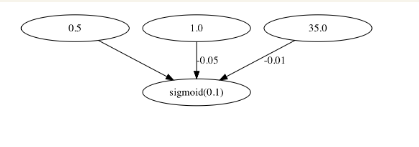

In [ ]:
## High Level approach

In [11]:
tf.random.set_seed(1234)
inputs = tf.constant([[1, 35]],dtype=tf.float32)
# define first dense layer
dense1 = tf.keras.layers.Dense(10, activation='sigmoid')(inputs)

# define second dense layer
dense2 = tf.keras.layers.Dense(5, activation='sigmoid')(dense1)

# define output (predictions) layer

outputs = tf.keras.layers.Dense(1, activation='sigmoid')(dense2)

In [12]:
print('\n prediction: {}'.format(outputs.numpy()[0,0]))


 prediction: 0.6861772537231445


## Let's build an image classifier 

### MNIST Handwritten Digit Recognition 

* MNIST is a collection of handwritten digits ranging from the number 0 to 9.

* MNIST contains 70,000 images of handwritten digits: 60,000 for training and 10,000 for testing

* The images are grayscale, 28x28 pixels,

## Setup

In [13]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
from tensorflow.keras import layers

## Prepare the data

In [14]:
# Model / data parameters
num_classes = 10
input_shape = (28, 28,1)

# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()


In [ ]:
# Let's inspect some images

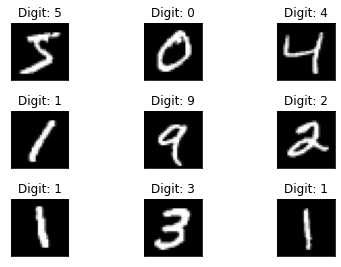

In [17]:
for i in range(9):
    plt.subplot(3,3,i+1) #creates a subplot within a 3x3 grid.
    plt.tight_layout() #  adjusts the spacing between subplots to minimize overlaps.
    plt.imshow(x_train[i], cmap='gray') # displays the ith image in the x_train dataset, with the color map set to gray.
    plt.title("Digit: {}".format(y_train[i])) # adds a title to the subplot
    plt.xticks([]) #remove the x and y axis ticks from the subplot.
    plt.yticks([])

In [18]:
# Scale images to the [0, 1] range
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Make sure images have shape (28, 28, 1)
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test, -1)
print("x_train shape:", x_train.shape)
print(x_train.shape[0], "train samples")
print(x_test.shape[0], "test samples")


# convert class vectors to binary class matrices
transformed_y_train = keras.utils.to_categorical(y_train, num_classes)
transformed_y_test = keras.utils.to_categorical(y_test, num_classes)


x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [19]:
print(y_train[0])
print(transformed_y_train[0])

5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


## Build the model

In [20]:
model = keras.Sequential(
    [
        #This layer creates an input layer to the model, with the shape of the input specified by the variable input_shape.
        keras.Input(shape=input_shape),
        #This layer flattens the input tensor, which means it converts the 2D input tensor to a 1D tensor.
        layers.Flatten(),
        #This layer creates a dense (or fully connected) layer with 16 neurons, and the rectified linear unit (ReLU) activation function.
        layers.Dense(16, activation='relu'),
        
        layers.Dense(num_classes, activation="softmax"),
    ]
)

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_15 (Dense)            (None, 16)                12560     
                                                                 
 dense_16 (Dense)            (None, 10)                170       
                                                                 
Total params: 12,730
Trainable params: 12,730
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compile the model

In [21]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])


## Train the model

In [22]:
batch_size = 128
epochs = 15

history = model.fit(x_train, transformed_y_train, batch_size=batch_size, epochs=epochs, validation_split=0.2)


Epoch 1/15
375/375 [==============================] - 3s 3ms/step - loss: 0.6625 - accuracy: 0.8238 - val_loss: 0.3352 - val_accuracy: 0.9088
Epoch 2/15
375/375 [==============================] - 1s 2ms/step - loss: 0.3214 - accuracy: 0.9114 - val_loss: 0.2782 - val_accuracy: 0.9233
Epoch 3/15
375/375 [==============================] - 1s 2ms/step - loss: 0.2811 - accuracy: 0.9213 - val_loss: 0.2574 - val_accuracy: 0.9278
Epoch 4/15
375/375 [==============================] - 1s 2ms/step - loss: 0.2590 - accuracy: 0.9273 - val_loss: 0.2446 - val_accuracy: 0.9298
Epoch 5/15
375/375 [==============================] - 1s 2ms/step - loss: 0.2435 - accuracy: 0.9302 - val_loss: 0.2364 - val_accuracy: 0.9337
Epoch 6/15
375/375 [==============================] - 1s 2ms/step - loss: 0.2302 - accuracy: 0.9347 - val_loss: 0.2278 - val_accuracy: 0.9357
Epoch 7/15
375/375 [==============================] - 1s 2ms/step - loss: 0.2183 - accuracy: 0.9375 - val_loss: 0.2183 - val_accuracy: 0.9403
Epoch 

## Evaluate the trained model


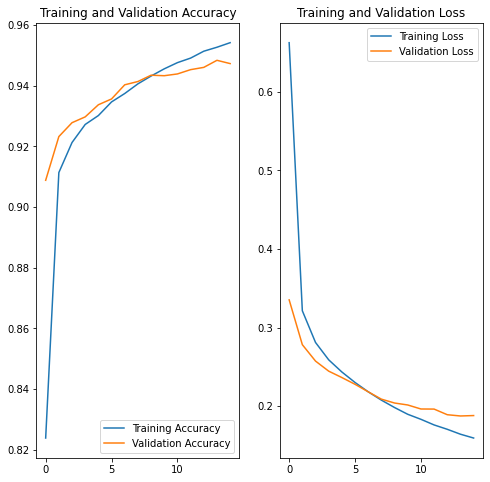

In [23]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [24]:
train_score = model.evaluate(x_train , transformed_y_train)
print("Train loss:", train_score[0])
print("Train accuracy:", train_score[1])

1875/1875 [==============================] - 2s 1ms/step - loss: 0.1584 - accuracy: 0.9554
Train loss: 0.15840667486190796
Train accuracy: 0.9554333090782166


In [25]:
score = model.evaluate(x_test, transformed_y_test)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

313/313 [==============================] - 0s 1ms/step - loss: 0.1814 - accuracy: 0.9465
Test loss: 0.18143723905086517
Test accuracy: 0.9465000033378601


In [26]:
# make prediction on the the first image in the testing set
model.predict(x_test)[0] # list of probabilities for each class

313/313 [==============================] - 0s 908us/step


array([1.5168966e-07, 3.8075917e-10, 4.6072422e-05, 5.0777462e-03,
       2.3325539e-08, 3.7963033e-05, 1.6536325e-10, 9.9480665e-01,
       5.4361567e-06, 2.6021635e-05], dtype=float32)

In [27]:
model.predict(x_test[0])

1/1 [==============================] - 0s 51ms/step


array([[1.5168936e-07, 3.8075773e-10, 4.6072379e-05, 5.0777346e-03,
        2.3325541e-08, 3.7962927e-05, 1.6536325e-10, 9.9480671e-01,
        5.4361672e-06, 2.6021660e-05]], dtype=float32)

In [28]:
# how to know wich class is mostly for the first image? 
print ("the first image is : ", np.argmax(model.predict(x_test)[0]))

313/313 [==============================] - 0s 982us/step
the first image is :  7


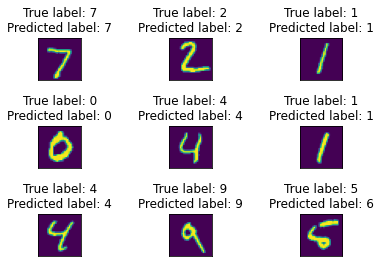

In [30]:
# plotting the first 9 images of the test set and their predictions 
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_test[i])
    plt.title(f'True label: {y_test[i]}\nPredicted label: {np.argmax(model.predict(x_test, verbose=0)[i])}')
    plt.xticks([])
    plt.yticks([])

In [31]:
# save the model
model.save("DIGIT_CLassifier")

INFO:tensorflow:Assets written to: DIGIT_CLassifier/assets


In [32]:
# load the model 
loaded_model = tf.keras.models.load_model("DIGIT_CLassifier")

In [33]:
loaded_model.predict(x_test)[0]

313/313 [==============================] - 0s 944us/step


array([1.5168966e-07, 3.8075917e-10, 4.6072422e-05, 5.0777462e-03,
       2.3325539e-08, 3.7963033e-05, 1.6536325e-10, 9.9480665e-01,
       5.4361567e-06, 2.6021635e-05], dtype=float32)

In [34]:
# try to predict on the singular image
loaded_model.predict(x_test[0])

1/1 [==============================] - 0s 53ms/step


array([[1.5168936e-07, 3.8075773e-10, 4.6072379e-05, 5.0777346e-03,
        2.3325541e-08, 3.7962927e-05, 1.6536325e-10, 9.9480671e-01,
        5.4361672e-06, 2.6021660e-05]], dtype=float32)

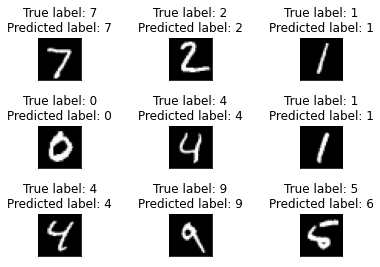

In [35]:
# Re-plot the images with loaded model
# plotting the first 9 images of the test set and their predictions 
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.tight_layout()
    plt.imshow(x_test[i], cmap='gray')
    plt.title(f'True label: {y_test[i]}\nPredicted label: {np.argmax(loaded_model.predict(x_test[i], verbose=0))}')
    plt.xticks([])
    plt.yticks([])
